# 6.5 - Unsupervised Machine Learning

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [4]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.
%matplotlib inline

In [5]:
#establishing a path
path = r'C:\Users\harkn\OneDrive\Desktop\Tasks\Data Immersion\Achievement 6 - IndeGo BikeShare'

In [6]:
#importing dataframes
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', '11-6_cleaned_data_full.pkl'))

In [7]:
df.head()

trip_id  duration          start_time            end_time  start_station  \
0  579507686        70 2023-01-01 00:00:00 2023-01-01 01:10:00           3063   
1  579499091        17 2023-01-01 00:05:00 2023-01-01 00:22:00           3190   
2  579499089        11 2023-01-01 00:06:00 2023-01-01 00:17:00           3182   
3  579499087         1 2023-01-01 00:08:00 2023-01-01 00:09:00           3026   
4  579499085        27 2023-01-01 00:09:00 2023-01-01 00:36:00           3046   

   start_lat  start_lon  end_station    end_lat    end_lon  ...  \
0  39.946331 -75.169800         3063  39.946331 -75.169800  ...   
1  39.948921 -75.169907         3207  39.954411 -75.192001  ...   
2  39.950809 -75.169533         3102  39.967590 -75.179520  ...   
3  39.941818 -75.145500         3026  39.941818 -75.145500  ...   
4  39.950119 -75.144722         3112  39.953732 -75.218246  ...   

   start_station_name                            end_station_name  \
0         17th & Pine                                 17th & Pine   
1       17th & Locust                             34th & Chestnut   
2       17th & Sansom  Pennsylvania & Fairmount Perelman Building   
3       2nd & Lombard                               2nd & Lombard   
4        2nd & Market                               48th & Spruce   

  trip_category_code bike_type_code  start_date start_time_of_day    end_date  \
0                  0              1  2023-01-01          00:00:00  2023-01-01   
1                  1              0  2023-01-01          00:05:00  2023-01-01   
2                  1              1  2023-01-01          00:06:00  2023-01-01   
3                  0              1  2023-01-01          00:08:00  2023-01-01   
4                  1              1  2023-01-01          00:09:00  2023-01-01   

   end_time_of_day              start_point                end_point  
0         01:10:00    (39.946331, -75.1698)    (39.946331, -75.1698)  
1         00:22:00  (39.948921, -75.169907)  (39.954411, -75.192001)  
2         00:17:00  (39.950809, -75.169533)    (39.96759, -75.17952)  
3         00:09:00    (39.941818, -75.1455)    (39.941818, -75.1455)  
4         00:36:00  (39.950119, -75.144722)  (39.953732, -75.218246)  

[5 rows x 25 columns]

In [8]:
df.columns

Index(['trip_id', 'duration', 'start_time', 'end_time', 'start_station',
       'start_lat', 'start_lon', 'end_station', 'end_lat', 'end_lon',
       'bike_id', 'plan_duration', 'trip_route_category', 'passholder_type',
       'bike_type', 'start_station_name', 'end_station_name',
       'trip_category_code', 'bike_type_code', 'start_date',
       'start_time_of_day', 'end_date', 'end_time_of_day', 'start_point',
       'end_point'],
      dtype='object')

### Prepping for kMeans

In [10]:
df_kmeans = df[['trip_id', 'duration', 'start_time', 'end_time', 'start_station', 'end_station', 'start_date', 
                'end_date', 'start_lat', 'start_lon', 'end_lat', 'end_lon']]

In [11]:
df_kmeans.head()

trip_id  duration          start_time            end_time  start_station  \
0  579507686        70 2023-01-01 00:00:00 2023-01-01 01:10:00           3063   
1  579499091        17 2023-01-01 00:05:00 2023-01-01 00:22:00           3190   
2  579499089        11 2023-01-01 00:06:00 2023-01-01 00:17:00           3182   
3  579499087         1 2023-01-01 00:08:00 2023-01-01 00:09:00           3026   
4  579499085        27 2023-01-01 00:09:00 2023-01-01 00:36:00           3046   

   end_station  start_date    end_date  start_lat  start_lon    end_lat  \
0         3063  2023-01-01  2023-01-01  39.946331 -75.169800  39.946331   
1         3207  2023-01-01  2023-01-01  39.948921 -75.169907  39.954411   
2         3102  2023-01-01  2023-01-01  39.950809 -75.169533  39.967590   
3         3026  2023-01-01  2023-01-01  39.941818 -75.145500  39.941818   
4         3112  2023-01-01  2023-01-01  39.950119 -75.144722  39.953732   

     end_lon  
0 -75.169800  
1 -75.192001  
2 -75.179520  
3 -75.145500  
4 -75.218246

In [12]:
df_kmeans.columns

Index(['trip_id', 'duration', 'start_time', 'end_time', 'start_station',
       'end_station', 'start_date', 'end_date', 'start_lat', 'start_lon',
       'end_lat', 'end_lon'],
      dtype='object')

In [13]:
df_kmeans.dtypes

trip_id                   int64
duration                  int64
start_time       datetime64[ns]
end_time         datetime64[ns]
start_station             int64
end_station               int64
start_date               object
end_date                 object
start_lat               float64
start_lon               float64
end_lat                 float64
end_lon                 float64
dtype: object

### Assign 'trip_id' as index

In [15]:
# Reset index so that you can use the "Date" column as a filter

df_kmeans = df_kmeans.reset_index()

In [16]:
# Set the "trip_id" column as the index

df_kmeans = df_kmeans.set_index('trip_id') # Set the trip_id as the index of the dataframe.
df_kmeans.head()

index  duration          start_time            end_time  \
trip_id                                                              
579507686      0        70 2023-01-01 00:00:00 2023-01-01 01:10:00   
579499091      1        17 2023-01-01 00:05:00 2023-01-01 00:22:00   
579499089      2        11 2023-01-01 00:06:00 2023-01-01 00:17:00   
579499087      3         1 2023-01-01 00:08:00 2023-01-01 00:09:00   
579499085      4        27 2023-01-01 00:09:00 2023-01-01 00:36:00   

           start_station  end_station  start_date    end_date  start_lat  \
trip_id                                                                    
579507686           3063         3063  2023-01-01  2023-01-01  39.946331   
579499091           3190         3207  2023-01-01  2023-01-01  39.948921   
579499089           3182         3102  2023-01-01  2023-01-01  39.950809   
579499087           3026         3026  2023-01-01  2023-01-01  39.941818   
579499085           3046         3112  2023-01-01  2023-01-01  39.950119   

           start_lon    end_lat    end_lon  
trip_id                                     
579507686 -75.169800  39.946331 -75.169800  
579499091 -75.169907  39.954411 -75.192001  
579499089 -75.169533  39.967590 -75.179520  
579499087 -75.145500  39.941818 -75.145500  
579499085 -75.144722  39.953732 -75.218246

In [17]:
# Drop 'index' column

df_kmeans = df_kmeans.drop(columns=['index'])

### Convert start time and end time to integers

In [19]:
# Ensure 'start_time' and 'end_time' are in datetime format
df_kmeans['start_time'] = pd.to_datetime(df_kmeans['start_time'], errors='coerce')
df_kmeans['end_time'] = pd.to_datetime(df_kmeans['end_time'], errors='coerce')

# Convert 'start_time' and 'end_time' to Unix timestamps in seconds (int64)
df_kmeans['start_time'] = df_kmeans['start_time'].astype('int64') // 10**9
df_kmeans['end_time'] = df_kmeans['end_time'].astype('int64') // 10**9

In [20]:
# Convert datetime columns to Unix timestamps in seconds (int64)
datetime_columns = ['start_date', 'end_date',]
for col in datetime_columns:
    df_kmeans[col] = pd.to_datetime(df_kmeans[col], errors='coerce').astype('int64') // 10**9

In [21]:
df_kmeans.head()

duration  start_time    end_time  start_station  end_station  \
trip_id                                                                   
579507686        70  1672531200  1672535400           3063         3063   
579499091        17  1672531500  1672532520           3190         3207   
579499089        11  1672531560  1672532220           3182         3102   
579499087         1  1672531680  1672531740           3026         3026   
579499085        27  1672531740  1672533360           3046         3112   

           start_date    end_date  start_lat  start_lon    end_lat    end_lon  
trip_id                                                                        
579507686  1672531200  1672531200  39.946331 -75.169800  39.946331 -75.169800  
579499091  1672531200  1672531200  39.948921 -75.169907  39.954411 -75.192001  
579499089  1672531200  1672531200  39.950809 -75.169533  39.967590 -75.179520  
579499087  1672531200  1672531200  39.941818 -75.145500  39.941818 -75.145500  
579499085  1672531200  1672531200  39.950119 -75.144722  39.953732 -75.218246

In [22]:
df_kmeans.dtypes

duration           int64
start_time         int64
end_time           int64
start_station      int64
end_station        int64
start_date         int64
end_date           int64
start_lat        float64
start_lon        float64
end_lat          float64
end_lon          float64
dtype: object

### Standardize the values

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
# Initialize the scaler
scaler = StandardScaler()

In [26]:
# Fit and transform only the numeric columns in df_kmeans
numeric_columns = df_kmeans.select_dtypes(include=['float64', 'int64']).columns  # Select only numeric columns
df_kmeans[numeric_columns] = scaler.fit_transform(df_kmeans[numeric_columns])

In [27]:
df_kmeans.head()

duration  start_time  end_time  start_station  end_station  \
trip_id                                                                 
579507686  1.174691   -2.111684 -2.111292      -0.745614    -0.731986   
579499091  0.017521   -2.111646 -2.111650       0.468831     0.636844   
579499089 -0.113479   -2.111639 -2.111687       0.392331    -0.361261   
579499087 -0.331813   -2.111624 -2.111747      -1.099429    -1.083699   
579499085  0.235855   -2.111617 -2.111546      -0.908177    -0.266203   

           start_date  end_date  start_lat  start_lon   end_lat   end_lon  
trip_id                                                                    
579507686   -2.105163 -2.105227  -0.410581   0.012389 -0.398664 -0.007546  
579499091   -2.105163 -2.105227  -0.231180   0.006367  0.158094 -1.256202  
579499089   -2.105163 -2.105227  -0.100404   0.027416  1.066202 -0.554230  
579499087   -2.105163 -2.105227  -0.723183   1.380006 -0.709635  1.359164  
579499085   -2.105163 -2.105227  -0.148198   1.423792  0.111307 -2.732305

In [28]:
df_kmeans.shape

(1084547, 11)

In [29]:
# Check for missing values in each column
df_kmeans.isna().sum()

duration             0
start_time           0
end_time             0
start_station        0
end_station          0
start_date           0
end_date             0
start_lat           31
start_lon           31
end_lat          12154
end_lon          12154
dtype: int64

In [30]:
# Assign average to NaN values 'start_lat', 'start_lon', 'end_lat', 'end_lon'

columns_to_fill = ['start_lat', 'start_lon', 'end_lat', 'end_lon']
df_kmeans[columns_to_fill] = df_kmeans[columns_to_fill].apply(lambda col: col.fillna(col.mean()))

In [31]:
# Check for missing values in each column
df_kmeans.isna().sum()

duration         0
start_time       0
end_time         0
start_station    0
end_station      0
start_date       0
end_date         0
start_lat        0
start_lon        0
end_lat          0
end_lon          0
dtype: int64

No missing values

### The Elbow Technique

In [34]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [35]:
# List to store the scores (inertia values) for each k
scores = []

In [36]:
# Calculate KMeans for each number of clusters in num_cl
for i in num_cl:
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42)  # Set random_state for reproducibility
    kmeans.fit(df_kmeans)
    scores.append(-kmeans.score(df_kmeans)) 

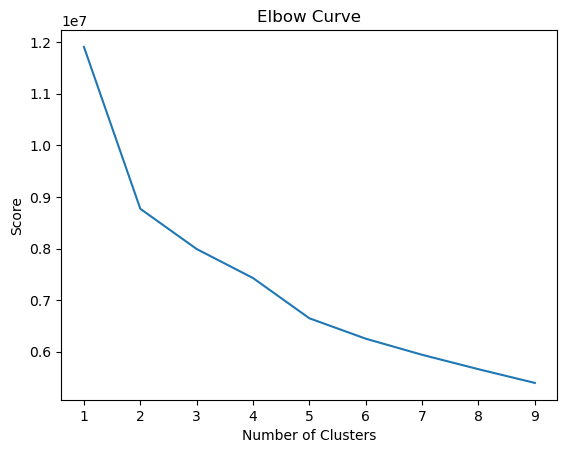

In [37]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,scores)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### I'm choosing '5' clusters because it smooths out at this point.

### kmeans Clustering

In [67]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 5) 

In [69]:
# Fit the k-means object to the data.

kmeans.fit(df_kmeans)

C:\Users\harkn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [70]:
df_kmeans['clusters'] = kmeans.fit_predict(df_kmeans)

C:\Users\harkn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [71]:
df_kmeans.head()

duration  start_time  end_time  start_station  end_station  \
trip_id                                                                 
579507686  1.174691   -2.111684 -2.111292      -0.745614    -0.731986   
579499091  0.017521   -2.111646 -2.111650       0.468831     0.636844   
579499089 -0.113479   -2.111639 -2.111687       0.392331    -0.361261   
579499087 -0.331813   -2.111624 -2.111747      -1.099429    -1.083699   
579499085  0.235855   -2.111617 -2.111546      -0.908177    -0.266203   

           start_date  end_date  start_lat  start_lon   end_lat   end_lon  \
trip_id                                                                     
579507686   -2.105163 -2.105227  -0.410581   0.012389 -0.398664 -0.007546   
579499091   -2.105163 -2.105227  -0.231180   0.006367  0.158094 -1.256202   
579499089   -2.105163 -2.105227  -0.100404   0.027416  1.066202 -0.554230   
579499087   -2.105163 -2.105227  -0.723183   1.380006 -0.709635  1.359164   
579499085   -2.105163 -2.105227  -0.148198   1.423792  0.111307 -2.732305   

           clusters  
trip_id              
579507686         1  
579499091         1  
579499089         1  
579499087         1  
579499085         1

In [72]:
df_kmeans['clusters'].value_counts()

clusters
3    338680
0    308376
1    269282
2    166288
4      1921
Name: count, dtype: int64

In [73]:
df_kmeans.columns

Index(['duration', 'start_time', 'end_time', 'start_station', 'end_station',
       'start_date', 'end_date', 'start_lat', 'start_lon', 'end_lat',
       'end_lon', 'clusters'],
      dtype='object')

C:\Users\harkn\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


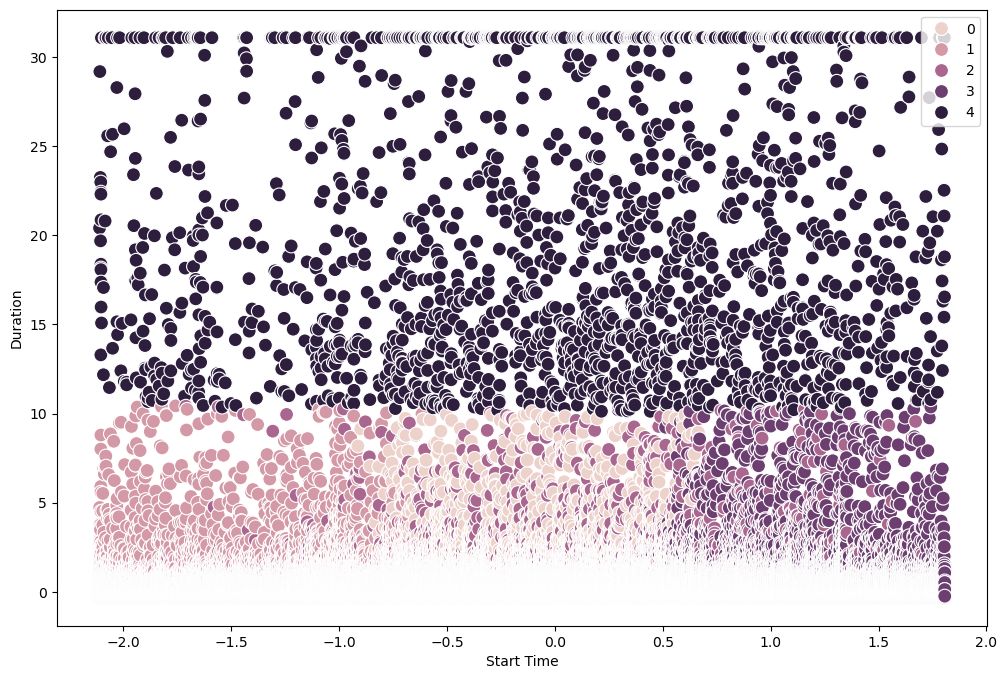

In [79]:
# Plot the clusters for the "duration" and "start_time" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_kmeans['start_time'], y=df_kmeans['duration'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Start Time') # Label x-axis.
plt.ylabel('Duration') # Label y-axis.
plt.show()

C:\Users\harkn\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


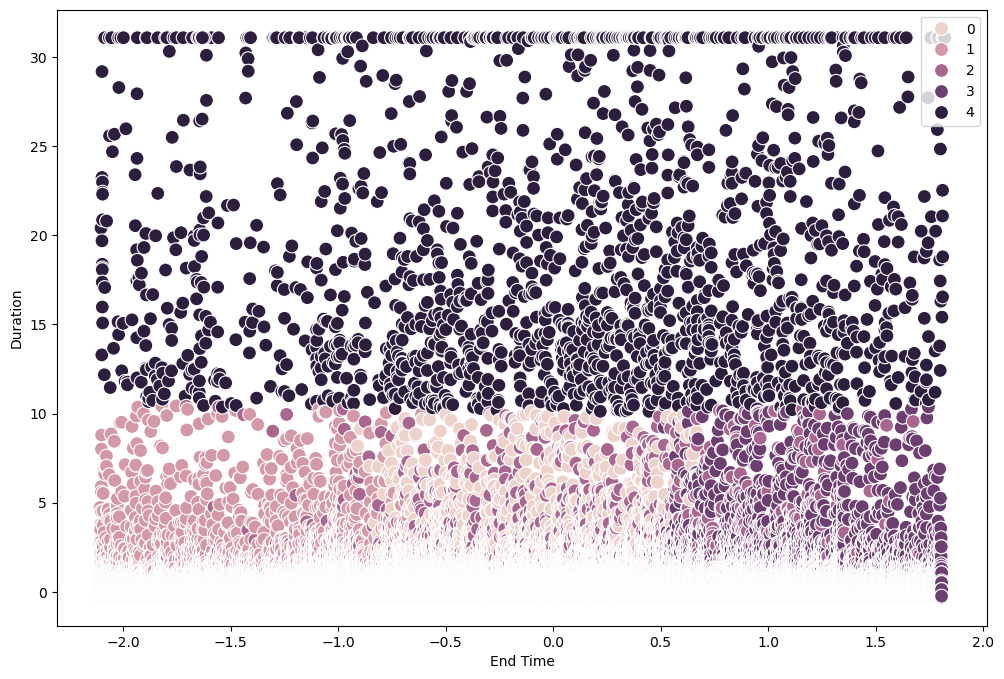

In [80]:
# Plot the clusters for the "duration" and "end_time" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_kmeans['end_time'], y=df_kmeans['duration'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('End Time') # Label x-axis.
plt.ylabel('Duration') # Label y-axis.
plt.show()

I notice a strong correlation between Groups 0, 2, and 3 which I will be labeling to be "Morning" "Daytime" and "Night" riders. Group 4 would be "Distance" riders. Group 1 requires further analysis.

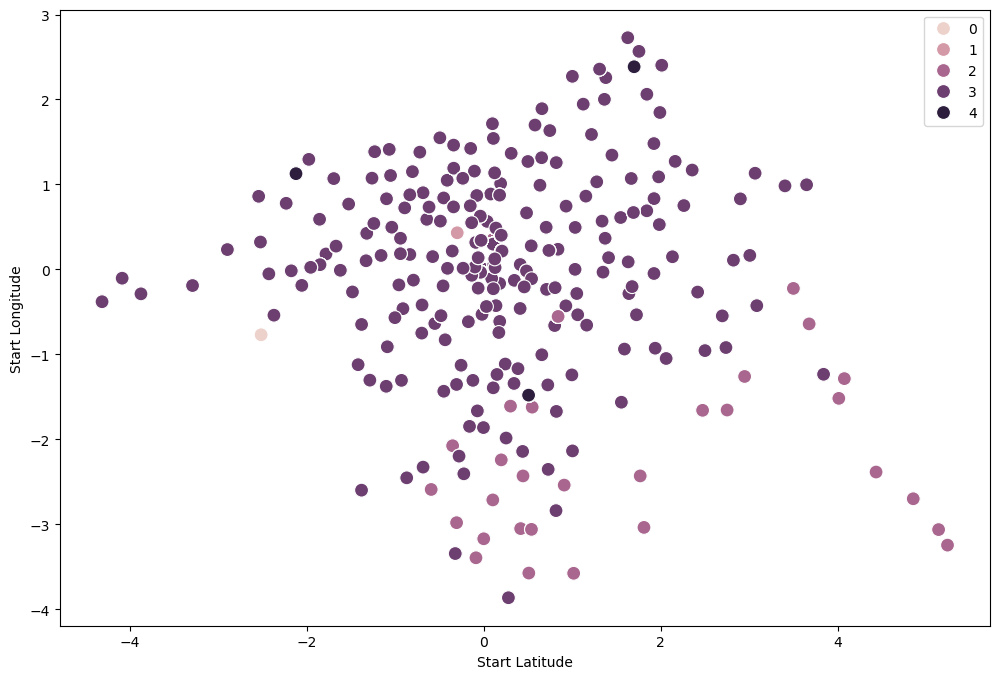

In [82]:
# Plot the clusters for the "start_lon" and "start_lat" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_kmeans['start_lat'], y=df_kmeans['start_lon'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Start Latitude') # Label x-axis.
plt.ylabel('Start Longitude') # Label y-axis.
plt.show()

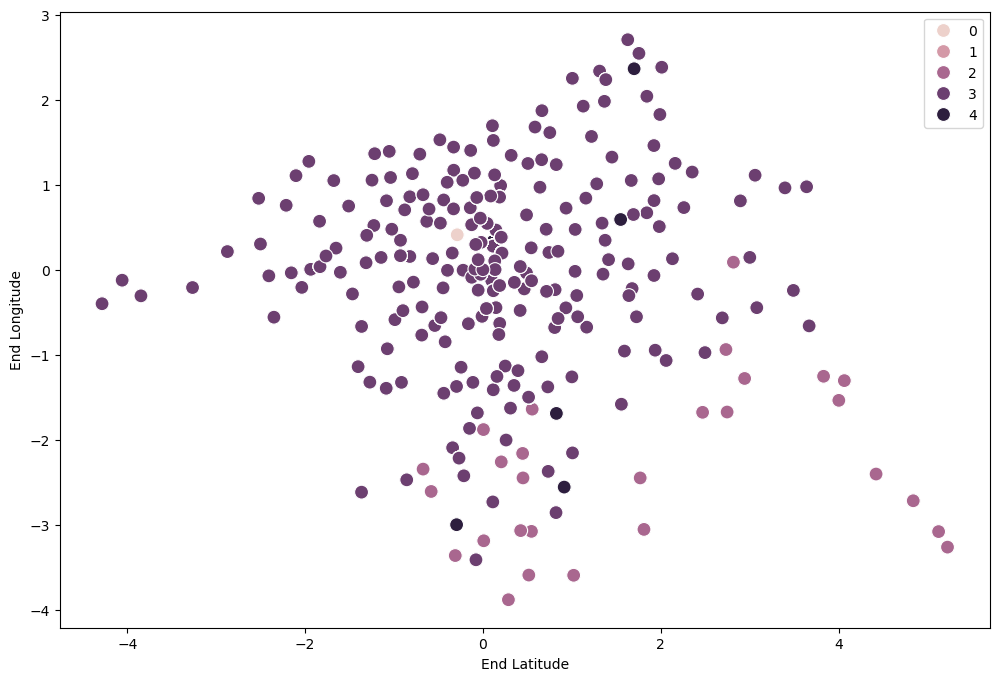

In [83]:
# Plot the clusters for the "end_lon" and "end_lat" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_kmeans['end_lat'], y=df_kmeans['end_lon'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('End Latitude') # Label x-axis.
plt.ylabel('End Longitude') # Label y-axis.
plt.show()

C:\Users\harkn\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


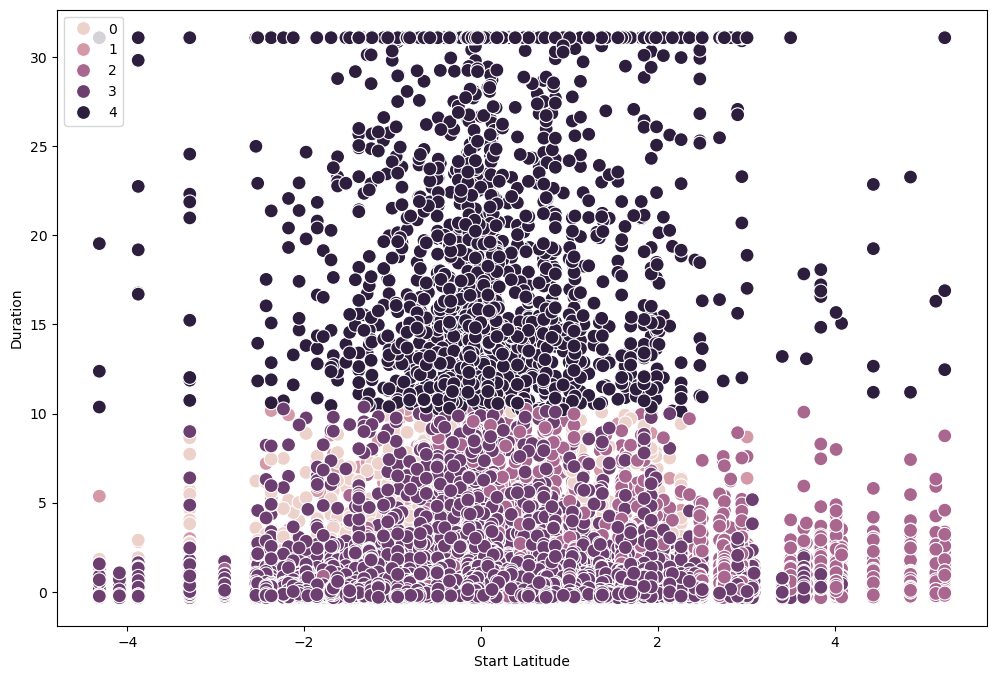

In [84]:
# Plot the clusters for the "duration" and "start_lat" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_kmeans['start_lat'], y=df_kmeans['duration'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Start Latitude') # Label x-axis.
plt.ylabel('Duration') # Label y-axis.
plt.show()

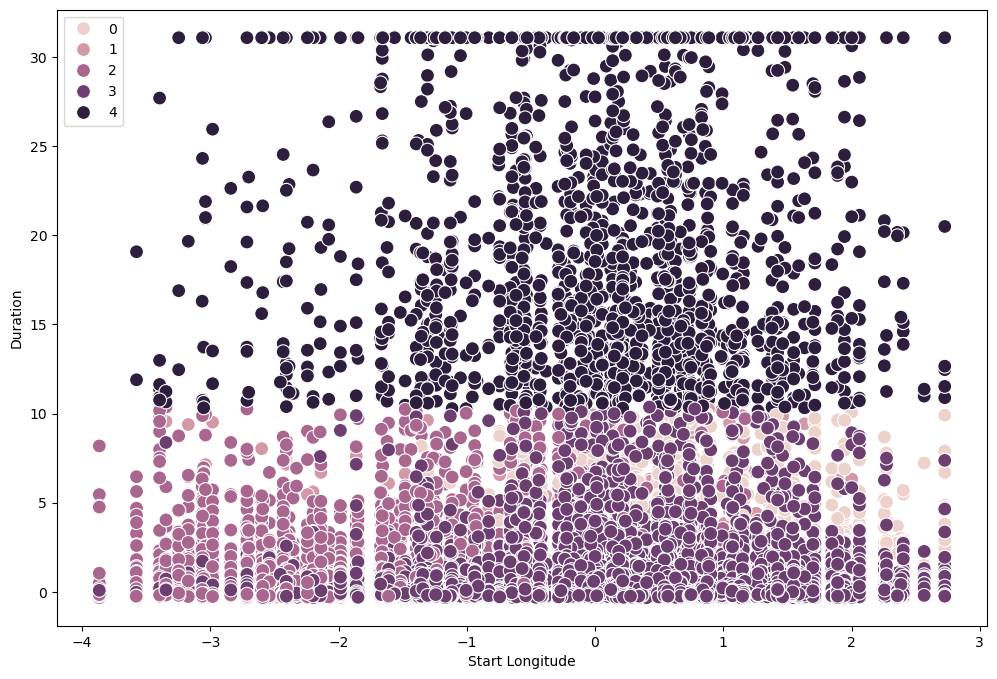

In [85]:
# Plot the clusters for the "duration" and "start_lon" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_kmeans['start_lon'], y=df_kmeans['duration'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Start Longitude') # Label x-axis.
plt.ylabel('Duration') # Label y-axis.
plt.show()

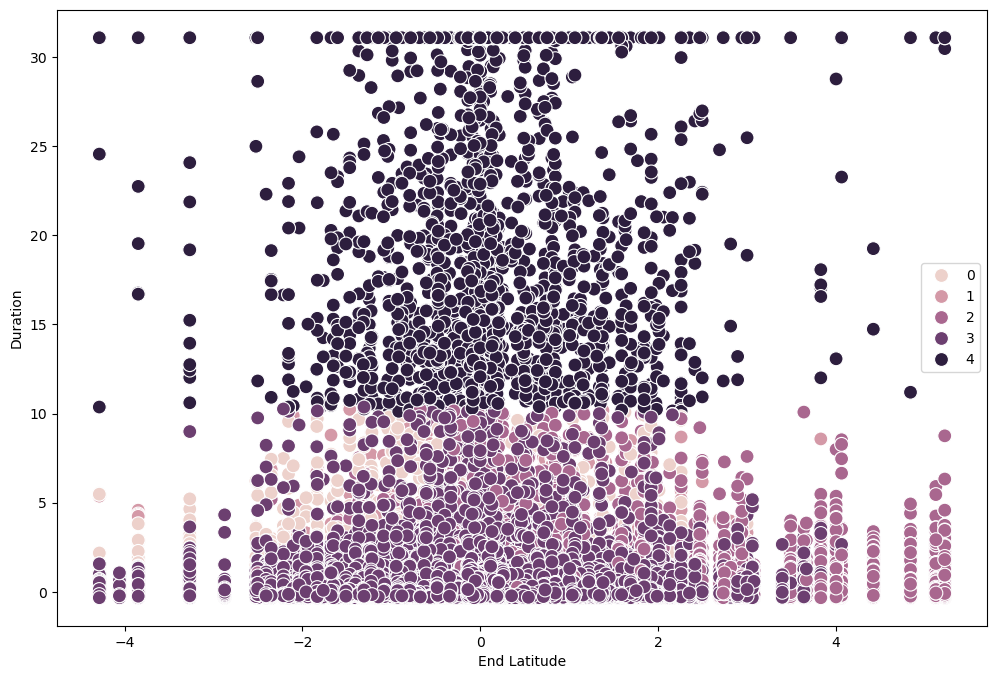

In [86]:
# Plot the clusters for the "duration" and "end_lat" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_kmeans['end_lat'], y=df_kmeans['duration'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('End Latitude') # Label x-axis.
plt.ylabel('Duration') # Label y-axis.
plt.show()

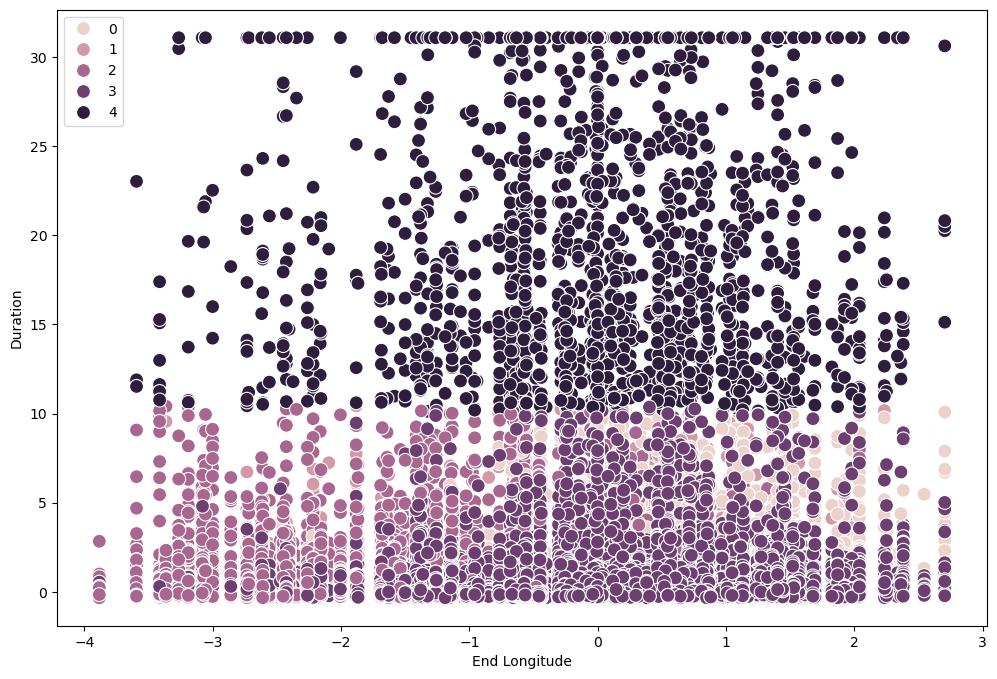

In [87]:
# Plot the clusters for the "duration" and "end_lon" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_kmeans['end_lon'], y=df_kmeans['duration'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('End Longitude') # Label x-axis.
plt.ylabel('Duration') # Label y-axis.
plt.show()

C:\Users\harkn\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


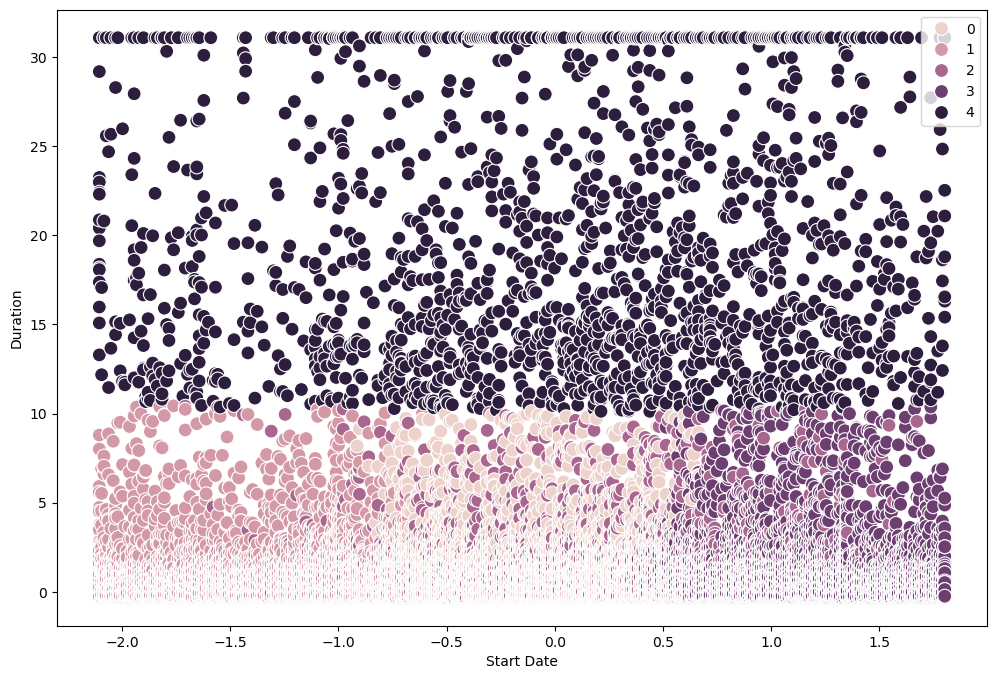

In [88]:
# Plot the clusters for the "duration" and "start_date" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_kmeans['start_date'], y=df_kmeans['duration'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Start Date') # Label x-axis.
plt.ylabel('Duration') # Label y-axis.
plt.show()

C:\Users\harkn\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


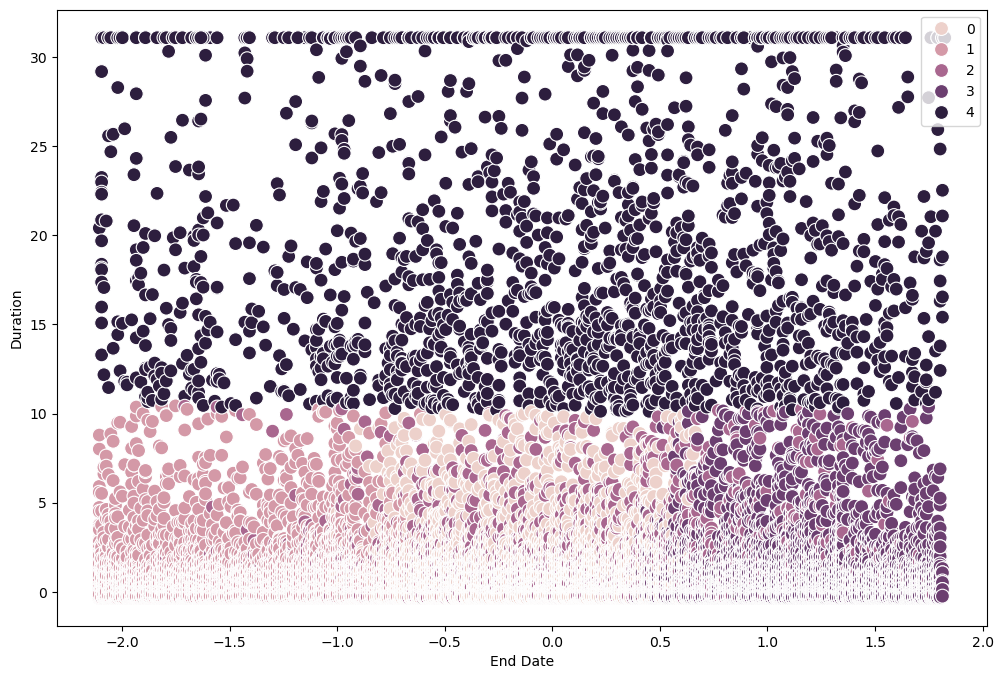

In [89]:
# Plot the clusters for the "duration" and "end_date" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_kmeans['end_date'], y=df_kmeans['duration'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('End Date') # Label x-axis.
plt.ylabel('Duration') # Label y-axis.
plt.show()

I see a similar correlation to 'start/end_time', although there are more riders overall in the summer months, the difference is not as extreme as i would have predicted.

# Reversing standardization

In [102]:
# Convert standardized data back to original scale
df_kmeans_original = df_kmeans.copy()  # Make a copy to avoid modifying the standardized DataFrame
df_kmeans_original[numeric_columns] = scaler.inverse_transform(df_kmeans[numeric_columns])

In [103]:
df_kmeans_original.head()

duration    start_time      end_time  start_station  end_station  \
trip_id                                                                       
579507686      70.0  1.672531e+09  1.672535e+09         3063.0       3063.0   
579499091      17.0  1.672532e+09  1.672533e+09         3190.0       3207.0   
579499089      11.0  1.672532e+09  1.672532e+09         3182.0       3102.0   
579499087       1.0  1.672532e+09  1.672532e+09         3026.0       3026.0   
579499085      27.0  1.672532e+09  1.672533e+09         3046.0       3112.0   

             start_date      end_date  start_lat  start_lon    end_lat  \
trip_id                                                                  
579507686  1.672531e+09  1.672531e+09  39.946331 -75.169800  39.946331   
579499091  1.672531e+09  1.672531e+09  39.948921 -75.169907  39.954411   
579499089  1.672531e+09  1.672531e+09  39.950809 -75.169533  39.967590   
579499087  1.672531e+09  1.672531e+09  39.941818 -75.145500  39.941818   
579499085  1.672531e+09  1.672531e+09  39.950119 -75.144722  39.953732   

             end_lon  clusters  
trip_id                         
579507686 -75.169800         1  
579499091 -75.192001         1  
579499089 -75.179520         1  
579499087 -75.145500         1  
579499085 -75.218246         1

In [106]:
# Convert Unix timestamp integers back to datetime
df_kmeans_original['start_time'] = pd.to_datetime(df_kmeans_original['start_time'], unit='s')
df_kmeans_original['end_time'] = pd.to_datetime(df_kmeans_original['end_time'], unit='s')

In [107]:
# Convert Unix timestamp integers back to datetime for specified columns
datetime_columns = ['start_date', 'end_date',]
for col in datetime_columns:
    df_kmeans_original[col] = pd.to_datetime(df_kmeans_original[col], unit='s', errors='coerce')

In [110]:
df_kmeans_original.head()

duration          start_time            end_time  start_station  \
trip_id                                                                      
579507686      70.0 2023-01-01 00:00:00 2023-01-01 01:10:00         3063.0   
579499091      17.0 2023-01-01 00:05:00 2023-01-01 00:22:00         3190.0   
579499089      11.0 2023-01-01 00:06:00 2023-01-01 00:17:00         3182.0   
579499087       1.0 2023-01-01 00:08:00 2023-01-01 00:09:00         3026.0   
579499085      27.0 2023-01-01 00:09:00 2023-01-01 00:36:00         3046.0   

           end_station start_date   end_date  start_lat  start_lon    end_lat  \
trip_id                                                                         
579507686       3063.0 2023-01-01 2023-01-01  39.946331 -75.169800  39.946331   
579499091       3207.0 2023-01-01 2023-01-01  39.948921 -75.169907  39.954411   
579499089       3102.0 2023-01-01 2023-01-01  39.950809 -75.169533  39.967590   
579499087       3026.0 2023-01-01 2023-01-01  39.941818 -75.145500  39.941818   
579499085       3112.0 2023-01-01 2023-01-01  39.950119 -75.144722  39.953732   

             end_lon  clusters  
trip_id                         
579507686 -75.169800         1  
579499091 -75.192001         1  
579499089 -75.179520         1  
579499087 -75.145500         1  
579499085 -75.218246         1

### Descriptive statistics

In [113]:
df_kmeans_original.groupby('clusters').agg({'duration':['mean', 'median'], 
                         'start_time':['mean', 'median'], 
                         'end_time':['mean', 'median'],
                         'start_station':['mean', 'median'], 
                         'end_station':['mean', 'median'], 
                         'start_lat':['mean', 'median'], 
                         'start_lon':['mean', 'median'],
                        'end_lat':['mean', 'median'], 
                         'end_lon':['mean', 'median'],
                         'start_date':['mean', 'median'], 
                         'end_date':['mean', 'median']})

duration                           start_time                      \
                mean median                          mean              median   
clusters                                                                        
0          14.686376   10.0 2023-07-05 00:07:19.596466688 2023-07-06 11:39:00   
1          13.994095   10.0 2023-03-13 16:54:56.713928192 2023-03-17 09:19:00   
2          18.624314   11.0 2023-08-04 13:59:44.212330240 2023-08-05 19:16:00   
3          12.868233    9.0 2023-10-25 10:03:29.774831616 2023-10-23 16:47:00   
4         944.538261  853.0 2023-07-20 19:51:17.178552832 2023-07-31 23:08:00   

                              end_time                     start_station  \
                                  mean              median          mean   
clusters                                                                   
0        2023-07-05 00:22:00.782745856 2023-07-06 11:50:00   3131.636512   
1        2023-03-13 17:08:56.400650752 2023-03-17 09:28:30   3123.134019   
2        2023-08-04 14:18:21.584239360 2023-08-05 19:45:30   3173.451067   
3        2023-10-25 10:16:21.747431168 2023-10-23 16:58:00   3147.664117   
4        2023-07-21 19:41:51.816762112 2023-08-02 13:02:00   3148.845914   

                  end_station          ...  start_lon               end_lat  \
          median         mean  median  ...       mean     median       mean   
clusters                               ...                                    
0         3100.0  3131.187489  3100.0  ... -75.161747 -75.161209  39.948969   
1         3100.0  3122.144867  3099.0  ... -75.170459 -75.169800  39.951663   
2         3165.0  3171.989236  3165.0  ... -75.191611 -75.192001  39.961989   
3         3125.0  3146.615109  3125.0  ... -75.166607 -75.166740  39.950484   
4         3120.0  3124.690786  3099.0  ... -75.169462 -75.167580  39.954348   

                       end_lon                               start_date  \
             median       mean     median                          mean   
clusters                                                                  
0         39.950050 -75.161494 -75.161209 2023-07-04 09:26:46.537473792   
1         39.951340 -75.169961 -75.169666 2023-03-13 02:30:08.917046272   
2         39.956619 -75.191205 -75.192001 2023-08-03 23:33:58.141056512   
3         39.950481 -75.166296 -75.166740 2023-10-24 19:43:06.625723392   
4         39.952117 -75.169777 -75.169666 2023-07-20 04:18:36.918271744   

                                         end_date             
             median                          mean     median  
clusters                                                      
0        2023-07-06 2023-07-04 09:34:00.532337152 2023-07-06  
1        2023-03-17 2023-03-13 02:35:20.465534208 2023-03-17  
2        2023-08-05 2023-08-03 23:42:02.390070272 2023-08-05  
3        2023-10-23 2023-10-24 19:49:26.226526464 2023-10-23  
4        2023-07-31 2023-07-21 10:10:10.931806208 2023-08-02  

[5 rows x 22 columns]

### Add names to clusters and save

In [116]:
# Mapping of clusters to rider types
cluster_to_rider_type = {
    0: "Summer",
    1: "Spring",
    2: "Unknown",
    3: "Fall/Winter", 
    4: "Long Distance"}

In [120]:
# Creating the rider_type column based on the cluster values
df_kmeans_original['rider_type'] = df_kmeans_original['clusters'].map(cluster_to_rider_type)

In [122]:
df_kmeans_original.head()

duration          start_time            end_time  start_station  \
trip_id                                                                      
579507686      70.0 2023-01-01 00:00:00 2023-01-01 01:10:00         3063.0   
579499091      17.0 2023-01-01 00:05:00 2023-01-01 00:22:00         3190.0   
579499089      11.0 2023-01-01 00:06:00 2023-01-01 00:17:00         3182.0   
579499087       1.0 2023-01-01 00:08:00 2023-01-01 00:09:00         3026.0   
579499085      27.0 2023-01-01 00:09:00 2023-01-01 00:36:00         3046.0   

           end_station start_date   end_date  start_lat  start_lon    end_lat  \
trip_id                                                                         
579507686       3063.0 2023-01-01 2023-01-01  39.946331 -75.169800  39.946331   
579499091       3207.0 2023-01-01 2023-01-01  39.948921 -75.169907  39.954411   
579499089       3102.0 2023-01-01 2023-01-01  39.950809 -75.169533  39.967590   
579499087       3026.0 2023-01-01 2023-01-01  39.941818 -75.145500  39.941818   
579499085       3112.0 2023-01-01 2023-01-01  39.950119 -75.144722  39.953732   

             end_lon  clusters rider_type  
trip_id                                    
579507686 -75.169800         1     Spring  
579499091 -75.192001         1     Spring  
579499089 -75.179520         1     Spring  
579499087 -75.145500         1     Spring  
579499085 -75.218246         1     Spring

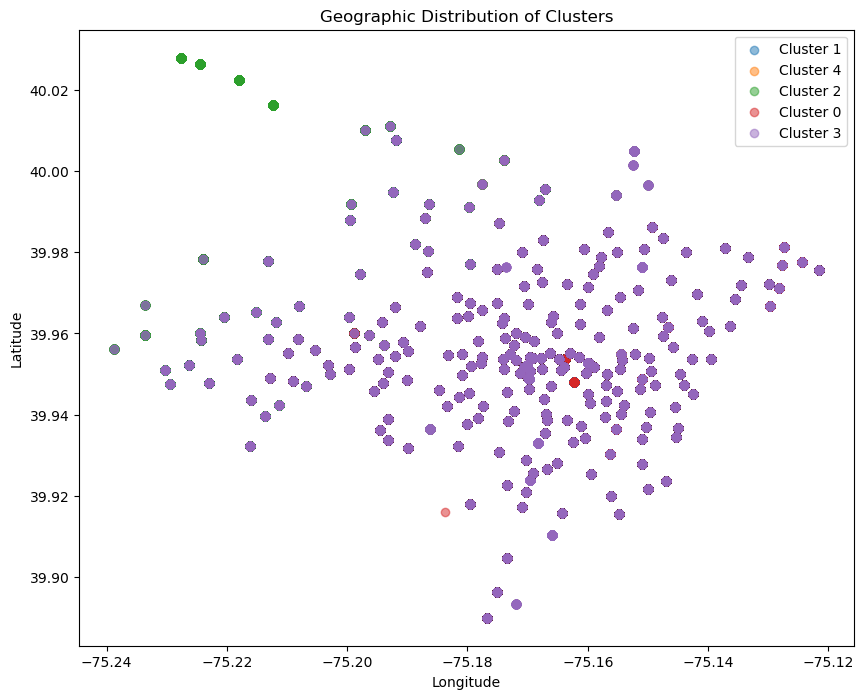

In [124]:
import matplotlib.pyplot as plt

# Plot each cluster with a different color
plt.figure(figsize=(10, 8))
for cluster in df_kmeans_original['clusters'].unique():
    cluster_data = df_kmeans_original[df_kmeans_original['clusters'] == cluster]
    plt.scatter(cluster_data['start_lon'], cluster_data['start_lat'], label=f'Cluster {cluster}', alpha=0.5)

# Add map details
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographic Distribution of Clusters')
plt.legend()
plt.show()

### Merging dataframe

In [126]:
# Reset the index to turn 'trip_id' into a regular column
df_kmeans_original = df_kmeans_original.reset_index()

In [127]:
df_kmeans_original.head()

trip_id  duration          start_time            end_time  start_station  \
0  579507686      70.0 2023-01-01 00:00:00 2023-01-01 01:10:00         3063.0   
1  579499091      17.0 2023-01-01 00:05:00 2023-01-01 00:22:00         3190.0   
2  579499089      11.0 2023-01-01 00:06:00 2023-01-01 00:17:00         3182.0   
3  579499087       1.0 2023-01-01 00:08:00 2023-01-01 00:09:00         3026.0   
4  579499085      27.0 2023-01-01 00:09:00 2023-01-01 00:36:00         3046.0   

   end_station start_date   end_date  start_lat  start_lon    end_lat  \
0       3063.0 2023-01-01 2023-01-01  39.946331 -75.169800  39.946331   
1       3207.0 2023-01-01 2023-01-01  39.948921 -75.169907  39.954411   
2       3102.0 2023-01-01 2023-01-01  39.950809 -75.169533  39.967590   
3       3026.0 2023-01-01 2023-01-01  39.941818 -75.145500  39.941818   
4       3112.0 2023-01-01 2023-01-01  39.950119 -75.144722  39.953732   

     end_lon  clusters rider_type  
0 -75.169800         1     Spring  
1 -75.192001         1     Spring  
2 -75.179520         1     Spring  
3 -75.145500         1     Spring  
4 -75.218246         1     Spring

In [128]:
df.head()

trip_id  duration          start_time            end_time  start_station  \
0  579507686        70 2023-01-01 00:00:00 2023-01-01 01:10:00           3063   
1  579499091        17 2023-01-01 00:05:00 2023-01-01 00:22:00           3190   
2  579499089        11 2023-01-01 00:06:00 2023-01-01 00:17:00           3182   
3  579499087         1 2023-01-01 00:08:00 2023-01-01 00:09:00           3026   
4  579499085        27 2023-01-01 00:09:00 2023-01-01 00:36:00           3046   

   start_lat  start_lon  end_station    end_lat    end_lon  ...  \
0  39.946331 -75.169800         3063  39.946331 -75.169800  ...   
1  39.948921 -75.169907         3207  39.954411 -75.192001  ...   
2  39.950809 -75.169533         3102  39.967590 -75.179520  ...   
3  39.941818 -75.145500         3026  39.941818 -75.145500  ...   
4  39.950119 -75.144722         3112  39.953732 -75.218246  ...   

   start_station_name                            end_station_name  \
0         17th & Pine                                 17th & Pine   
1       17th & Locust                             34th & Chestnut   
2       17th & Sansom  Pennsylvania & Fairmount Perelman Building   
3       2nd & Lombard                               2nd & Lombard   
4        2nd & Market                               48th & Spruce   

  trip_category_code bike_type_code  start_date start_time_of_day    end_date  \
0                  0              1  2023-01-01          00:00:00  2023-01-01   
1                  1              0  2023-01-01          00:05:00  2023-01-01   
2                  1              1  2023-01-01          00:06:00  2023-01-01   
3                  0              1  2023-01-01          00:08:00  2023-01-01   
4                  1              1  2023-01-01          00:09:00  2023-01-01   

   end_time_of_day              start_point                end_point  
0         01:10:00    (39.946331, -75.1698)    (39.946331, -75.1698)  
1         00:22:00  (39.948921, -75.169907)  (39.954411, -75.192001)  
2         00:17:00  (39.950809, -75.169533)    (39.96759, -75.17952)  
3         00:09:00    (39.941818, -75.1455)    (39.941818, -75.1455)  
4         00:36:00  (39.950119, -75.144722)  (39.953732, -75.218246)  

[5 rows x 25 columns]

In [129]:
# Merge 'rider_type' from 'df_kmeans_original' into 'df' based on 'trip_id'
df_merged = df.merge(df_kmeans_original[['trip_id', 'rider_type']], on='trip_id', how='left')

In [130]:
df_merged.head()

trip_id  duration          start_time            end_time  start_station  \
0  579507686        70 2023-01-01 00:00:00 2023-01-01 01:10:00           3063   
1  579499091        17 2023-01-01 00:05:00 2023-01-01 00:22:00           3190   
2  579499089        11 2023-01-01 00:06:00 2023-01-01 00:17:00           3182   
3  579499087         1 2023-01-01 00:08:00 2023-01-01 00:09:00           3026   
4  579499085        27 2023-01-01 00:09:00 2023-01-01 00:36:00           3046   

   start_lat  start_lon  end_station    end_lat    end_lon  ...  \
0  39.946331 -75.169800         3063  39.946331 -75.169800  ...   
1  39.948921 -75.169907         3207  39.954411 -75.192001  ...   
2  39.950809 -75.169533         3102  39.967590 -75.179520  ...   
3  39.941818 -75.145500         3026  39.941818 -75.145500  ...   
4  39.950119 -75.144722         3112  39.953732 -75.218246  ...   

                             end_station_name  trip_category_code  \
0                                 17th & Pine                   0   
1                             34th & Chestnut                   1   
2  Pennsylvania & Fairmount Perelman Building                   1   
3                               2nd & Lombard                   0   
4                               48th & Spruce                   1   

  bike_type_code  start_date start_time_of_day    end_date end_time_of_day  \
0              1  2023-01-01          00:00:00  2023-01-01        01:10:00   
1              0  2023-01-01          00:05:00  2023-01-01        00:22:00   
2              1  2023-01-01          00:06:00  2023-01-01        00:17:00   
3              1  2023-01-01          00:08:00  2023-01-01        00:09:00   
4              1  2023-01-01          00:09:00  2023-01-01        00:36:00   

               start_point                end_point rider_type  
0    (39.946331, -75.1698)    (39.946331, -75.1698)     Spring  
1  (39.948921, -75.169907)  (39.954411, -75.192001)     Spring  
2  (39.950809, -75.169533)    (39.96759, -75.17952)     Spring  
3    (39.941818, -75.1455)    (39.941818, -75.1455)     Spring  
4  (39.950119, -75.144722)  (39.953732, -75.218246)     Spring  

[5 rows x 26 columns]

In [137]:
#export new dataframe to pickle
df_merged.to_pickle(os.path.join(path, '02 Data','Prepared Data', '11-8_rider_cluster_data_full.pkl'))

# Final descriptive statistics

In [139]:
df_kmeans_original.groupby('clusters').agg({'duration':['mean', 'median'], 
                         'start_time':['mean', 'median'], 
                         'end_time':['mean', 'median'],
                         'start_station':['mean', 'median'], 
                         'end_station':['mean', 'median'], 
                         'start_lat':['mean', 'median'], 
                         'start_lon':['mean', 'median'],
                        'end_lat':['mean', 'median'], 
                         'end_lon':['mean', 'median'],
                         'start_date':['mean', 'median'], 
                         'end_date':['mean', 'median']})

duration                           start_time                      \
                mean median                          mean              median   
clusters                                                                        
0          14.686376   10.0 2023-07-05 00:07:19.596466688 2023-07-06 11:39:00   
1          13.994095   10.0 2023-03-13 16:54:56.713928192 2023-03-17 09:19:00   
2          18.624314   11.0 2023-08-04 13:59:44.212330240 2023-08-05 19:16:00   
3          12.868233    9.0 2023-10-25 10:03:29.774831616 2023-10-23 16:47:00   
4         944.538261  853.0 2023-07-20 19:51:17.178552832 2023-07-31 23:08:00   

                              end_time                     start_station  \
                                  mean              median          mean   
clusters                                                                   
0        2023-07-05 00:22:00.782745856 2023-07-06 11:50:00   3131.636512   
1        2023-03-13 17:08:56.400650752 2023-03-17 09:28:30   3123.134019   
2        2023-08-04 14:18:21.584239360 2023-08-05 19:45:30   3173.451067   
3        2023-10-25 10:16:21.747431168 2023-10-23 16:58:00   3147.664117   
4        2023-07-21 19:41:51.816762112 2023-08-02 13:02:00   3148.845914   

                  end_station          ...  start_lon               end_lat  \
          median         mean  median  ...       mean     median       mean   
clusters                               ...                                    
0         3100.0  3131.187489  3100.0  ... -75.161747 -75.161209  39.948969   
1         3100.0  3122.144867  3099.0  ... -75.170459 -75.169800  39.951663   
2         3165.0  3171.989236  3165.0  ... -75.191611 -75.192001  39.961989   
3         3125.0  3146.615109  3125.0  ... -75.166607 -75.166740  39.950484   
4         3120.0  3124.690786  3099.0  ... -75.169462 -75.167580  39.954348   

                       end_lon                               start_date  \
             median       mean     median                          mean   
clusters                                                                  
0         39.950050 -75.161494 -75.161209 2023-07-04 09:26:46.537473792   
1         39.951340 -75.169961 -75.169666 2023-03-13 02:30:08.917046272   
2         39.956619 -75.191205 -75.192001 2023-08-03 23:33:58.141056512   
3         39.950481 -75.166296 -75.166740 2023-10-24 19:43:06.625723392   
4         39.952117 -75.169777 -75.169666 2023-07-20 04:18:36.918271744   

                                         end_date             
             median                          mean     median  
clusters                                                      
0        2023-07-06 2023-07-04 09:34:00.532337152 2023-07-06  
1        2023-03-17 2023-03-13 02:35:20.465534208 2023-03-17  
2        2023-08-05 2023-08-03 23:42:02.390070272 2023-08-05  
3        2023-10-23 2023-10-24 19:49:26.226526464 2023-10-23  
4        2023-07-31 2023-07-21 10:10:10.931806208 2023-08-02  

[5 rows x 22 columns]

It would appear I have split the data into five groups, "Summer", "Spring", "Fall/Winter", and "Long Distance", and a fifth unknown group.